**Implementing a Neural Net**

In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()


Saving to_neural_net.csv to to_neural_net.csv


In [3]:
import io
face_recog = pd.read_csv(io.BytesIO(uploaded['to_neural_net.csv']))

In [107]:
face_recog['age_bins'] = pd.cut(x=face_recog['age'], 
                                bins=[0, 9, 29, 39, 49, 59, 69, 79, 89, 99, 130])
face_recog['age_encoded'] = pd.cut(x=face_recog['age'], 
                                bins=[0, 9, 29, 39, 49, 59, 69, 79, 89, 99, 130], 
                                labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
face_recog.head()

,age,ethnicity,gender,path,landmarks,nose2lip,lip2chin,len_between_eyes,left_eyelid_len,right_eyelid_len,nose_width,size_of_mouth,nose_len,bottom_lip_width,left_eye_size,right_eye_size,age_bins,age_encoded
0,1,Asian,Male,images\img0.jpg,"[[-7, 51], [-5, 81], [-1, 110], [5, 136], [18,...",0.127843,0.172767,0.237232,0.187906,0.179991,0.153473,0.274431,0.283629,0.060333,0.145301,0.109268,"(0, 9]",0
1,1,Asian,Male,images\img1.jpg,"[[6, 65], [10, 93], [17, 119], [24, 144], [35,...",0.115510,0.146110,0.275589,0.212916,0.201710,0.155617,0.248926,0.263344,0.078643,0.122885,0.084790,"(0, 9]",0
2,1,Asian,Male,images\img2.jpg,"[[11, 75], [12, 102], [17, 129], [23, 153], [3...",0.093780,0.214220,0.256911,0.193784,0.204183,0.151439,0.279955,0.264790,0.077230,0.121487,0.094426,"(0, 9]",0
3,1,Asian,Male,images\img3.jpg,"[[-6, 78], [-4, 105], [-1, 131], [3, 156], [13...",0.087586,0.221280,0.266966,0.170970,0.172216,0.181050,0.357491,0.256329,0.069628,0.121071,0.074953,"(0, 9]",0
4,1,Asian,Male,images\img4.jpg,"[[-4, 79], [-2, 104], [-1, 129], [0, 155], [8,...",0.093075,0.274444,0.275523,0.153957,0.150599,0.191064,0.422118,0.252346,0.054845,0.095940,0.049664,"(0, 9]",0


In [108]:
#Split the data into train test

train, test = train_test_split(face_recog, test_size=0.2)

**Use Neural Net to Predict Age**

In [109]:
#Use the encoded age for train and test labels
train_label = train["age_encoded"].values
test_label = test["age_encoded"].values
test_bins = test["age_bins"].values


In [110]:
#These are the bins for age
test_bins

[(29, 39], (9, 29], (39, 49], (59, 69], (9, 29], ..., (0, 9], (9, 29], (29, 39], (29, 39], (49, 59]]
Length: 4505
Categories (10, interval[int64]): [(0, 9] < (9, 29] < (29, 39] < (39, 49] ... (69, 79] < (79, 89] <
                                   (89, 99] < (99, 130]]

In [111]:
#drop all the unused columns for train and test data
train = train.drop(columns= ["age", "path", "landmarks", "age_bins", "age_encoded"])
test = test.drop(columns= ["age", "path", "landmarks", "age_bins", "age_encoded"])


In [112]:
train

,ethnicity,gender,nose2lip,lip2chin,len_between_eyes,left_eyelid_len,right_eyelid_len,nose_width,size_of_mouth,nose_len,bottom_lip_width,left_eye_size,right_eye_size
19500,Black,Male,0.094364,0.255281,0.277350,0.162148,0.175621,0.237577,0.499902,0.259754,0.058300,0.071107,0.037477
17013,Asian,Male,0.096970,0.244540,0.279557,0.193219,0.186595,0.177939,0.341797,0.252063,0.065536,0.103438,0.070757
1447,Indian,Female,0.114127,0.267422,0.280796,0.130842,0.136777,0.230275,0.454936,0.297121,0.077236,0.114127,0.077464
4840,Asian,Male,0.091976,0.233637,0.284897,0.172341,0.139356,0.187185,0.301347,0.284740,0.089596,0.111130,0.061121
5091,White,Female,0.093209,0.202761,0.292969,0.160208,0.150711,0.191983,0.520220,0.266421,0.069270,0.096060,0.054340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15293,Indian,Male,0.100964,0.296677,0.231884,0.136491,0.148338,0.212560,0.396165,0.314226,0.053359,0.097239,0.059288
14362,White,Male,0.144523,0.328379,0.243816,0.116730,0.114593,0.172628,0.360653,0.277928,0.050027,0.098341,0.061144
896,White,Female,0.091312,0.235332,0.254347,0.155719,0.155104,0.168159,0.323391,0.284482,0.080397,0.136197,0.099143
16572,Indian,Male,0.122859,0.295437,0.248649,0.104611,0.092960,0.232378,0.448674,0.301067,0.073715,0.105687,0.061430


In [113]:
#encode ethnicity and gender variables for train data
encoder_e = LabelEncoder()
encoder_e.fit(train["ethnicity"])
encoder_e.classes_

encoder_g = LabelEncoder()
encoder_g.fit(train["gender"])
encoder_g.classes_

e_train = encoder_e.transform(train["ethnicity"])
g_train = encoder_g.transform(train["gender"])
train.insert(13, "ethnicity_encoded", e_train)
train.insert(14, "gender_encoded", g_train)
train = train.drop(columns= ["ethnicity", "gender"])


In [114]:
#encode ethnicity and gender variables for train data
encoder_e = LabelEncoder()
encoder_e.fit(test["ethnicity"])
encoder_e.classes_

encoder_g = LabelEncoder()
encoder_g.fit(test["gender"])
encoder_g.classes_

e_test = encoder_e.transform(test["ethnicity"])
g_test = encoder_g.transform(test["gender"])
test.insert(13, "ethnicity_encoded", e_test)
test.insert(14, "gender_encoded", g_test)
test = test.drop(columns= ["ethnicity", "gender"])

In [115]:
test

,nose2lip,lip2chin,len_between_eyes,left_eyelid_len,right_eyelid_len,nose_width,size_of_mouth,nose_len,bottom_lip_width,left_eye_size,right_eye_size,ethnicity_encoded,gender_encoded
13934,0.118751,0.254221,0.268430,0.146042,0.132602,0.221842,0.474378,0.281266,0.059499,0.072569,0.032454,4,1
7589,0.095445,0.252386,0.264402,0.129520,0.133700,0.158537,0.379557,0.293156,0.052768,0.109060,0.064760,4,0
14859,0.095935,0.174165,0.296341,0.198565,0.208727,0.225000,0.444546,0.260909,0.093927,0.070009,0.031309,1,0
20292,0.094712,0.276344,0.232320,0.125000,0.135467,0.237424,0.474849,0.297839,0.043315,0.067842,0.032934,4,1
4970,0.080470,0.253644,0.266684,0.165893,0.165893,0.225614,0.528143,0.280004,0.068680,0.090894,0.047840,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0.112348,0.143070,0.279828,0.148341,0.145105,0.199168,0.417505,0.243600,0.069506,0.109962,0.068698,3,1
3191,0.063681,0.263453,0.253689,0.097541,0.124889,0.197943,0.416082,0.285064,0.061691,0.077592,0.045029,4,1
11384,0.106133,0.266458,0.251673,0.119831,0.145233,0.207426,0.393635,0.293960,0.079286,0.095865,0.063157,3,0
11118,0.125875,0.286253,0.260966,0.134858,0.142367,0.189198,0.373278,0.285038,0.059392,0.085020,0.048692,4,1


In [116]:
#run a neural net 

clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100, alpha=0.0001,
                     solver='lbfgs', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(train, train_label)
pred = clf.predict(test)
print(accuracy_score(test_label, pred))

0.44683684794672585


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Since the accuracy is really low, we decided to look more into different methods to differentiate age. Furthermore, with the additional features, I think we can run a neural net to predict ethnicity. We can probably find better results from predicting ethnicity. 


In [117]:
#This shows you the best variables to use for the model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=13)
fit = bestfeatures.fit(train, train_label)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))

                Specs       Score
11  ethnicity_encoded  863.769652
12     gender_encoded  437.887299
6       size_of_mouth   20.052969
10     right_eye_size   19.377142
1            lip2chin   17.038866
9       left_eye_size   15.474450
8    bottom_lip_width   10.683080
5          nose_width    9.194848
3     left_eyelid_len    7.356439
4    right_eyelid_len    6.749416
0            nose2lip    4.593998
7            nose_len    1.353222
2    len_between_eyes    0.266442


In [15]:
pd.DataFrame({"Predictions":pred, "Actual":test_label, "Bins": test_bins})

,Predictions,Actual,Bins
0,1,1,"(9, 29]"
1,1,1,"(9, 29]"
2,1,1,"(9, 29]"
3,1,1,"(9, 29]"
4,1,0,"(0, 9]"
...,...,...,...
4500,1,2,"(29, 39]"
4501,1,1,"(9, 29]"
4502,1,1,"(9, 29]"
4503,1,1,"(9, 29]"


**Using Neural Net to Predict ethnicity**

In [84]:
import random
train, test = train_test_split(face_recog, test_size=0.3, stratify=face_recog[['ethnicity']])

In [85]:
train = train.drop(columns= ["path", "landmarks", "age_bins", "age_encoded"])
test = test.drop(columns= ["path", "landmarks", "age_bins", "age_encoded"])


(array([2306.,    0., 2884.,    0.,    0., 2657.,    0., 6780.,    0.,
        1139.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

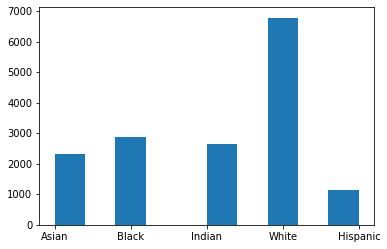

In [88]:
import matplotlib.pyplot as plt
plt.hist(train["ethnicity"])

In [89]:
encoder_e = LabelEncoder()
encoder_e.fit(train["ethnicity"])
encoder_e.classes_

encoder_g = LabelEncoder()
encoder_g.fit(train["gender"])
encoder_g.classes_

e_train = encoder_e.transform(train["ethnicity"])
g_train = encoder_g.transform(train["gender"])
train.insert(14, "ethnicity_encoded", e_train)
train.insert(15, "gender_encoded", g_train)
train = train.drop(columns= ["ethnicity", "gender"])



In [90]:
encoder_e = LabelEncoder()
encoder_e.fit(test["ethnicity"])
encoder_e.classes_

encoder_g = LabelEncoder()
encoder_g.fit(test["gender"])
encoder_g.classes_

e_test = encoder_e.transform(test["ethnicity"])
g_test = encoder_g.transform(test["gender"])
test.insert(14, "ethnicity_encoded", e_test)
test.insert(15, "gender_encoded", g_test)
test = test.drop(columns= ["ethnicity", "gender"])

In [91]:
train_label = train["ethnicity_encoded"].values
test_label = test["ethnicity_encoded"].values



In [92]:
train_label

array([0, 1, 3, ..., 1, 4, 0])

In [93]:
train.drop(columns = ["ethnicity_encoded"])
test.drop(columns=["ethnicity_encoded"])

,age,nose2lip,lip2chin,len_between_eyes,left_eyelid_len,right_eyelid_len,nose_width,size_of_mouth,nose_len,bottom_lip_width,left_eye_size,right_eye_size,gender_encoded
11194,31,0.083537,0.257633,0.267225,0.161353,0.179839,0.192905,0.375993,0.274627,0.098978,0.095528,0.063026,0
3594,21,0.101858,0.268823,0.288133,0.134244,0.130162,0.230354,0.492147,0.279327,0.049283,0.073467,0.032856,1
7185,26,0.114104,0.256203,0.242550,0.172397,0.172397,0.208093,0.386306,0.301935,0.062649,0.096776,0.057466,1
14975,40,0.114317,0.299903,0.261324,0.094757,0.100428,0.230403,0.440593,0.277316,0.044362,0.071013,0.044362,0
15615,42,0.107206,0.286689,0.256488,0.147854,0.146114,0.240785,0.450194,0.315569,0.058399,0.091222,0.052882,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,13,0.096318,0.224914,0.309501,0.136214,0.148391,0.197943,0.471890,0.289921,0.053251,0.103501,0.066151,0
1758,15,0.086927,0.253135,0.271887,0.154329,0.139192,0.193546,0.428592,0.274887,0.054977,0.088648,0.043982,1
12789,35,0.092450,0.311270,0.254990,0.071132,0.083717,0.173434,0.362014,0.304272,0.070165,0.087706,0.048216,1
20701,69,0.098528,0.260616,0.291835,0.092753,0.094185,0.205330,0.464727,0.295074,0.058146,0.091481,0.058146,0


In [94]:
clf = MLPClassifier(hidden_layer_sizes=(20), max_iter=100, alpha=0.0001,
                     solver='lbfgs', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(train, train_label)
pred = clf.predict(test)
print(accuracy_score(test_label, pred))

0.9952648712636875


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [95]:
df_ethnicity = pd.DataFrame({"Predicted":pred, "Actual" :test_label})
df_ethnicity

,Predicted,Actual
0,1,1
1,2,2
2,4,4
3,4,4
4,4,4
...,...,...
6753,4,4
6754,4,4
6755,4,4
6756,4,4


In [96]:
#This shows you the best variables to use for the model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=13)
fit = bestfeatures.fit(train, train_label)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))

                Specs         Score
12  ethnicity_encoded  14515.764514
0                 age  11655.430340
13     gender_encoded     41.209343
2            lip2chin     13.855737
4     left_eyelid_len     13.505561
5    right_eyelid_len     13.120116
7       size_of_mouth     12.688324
9    bottom_lip_width     10.968819
6          nose_width      9.935843
11     right_eye_size      2.327700
10      left_eye_size      2.013703
3    len_between_eyes      1.388985
1            nose2lip      1.331978
8            nose_len      0.600367


**Using Neural Net to Predict Gender**

In [97]:
import random
train, test = train_test_split(face_recog, test_size=0.3)

In [98]:
train = train.drop(columns= ["path", "landmarks", "age_bins", "age_encoded"])
test = test.drop(columns= ["path", "landmarks", "age_bins", "age_encoded"])

In [99]:
encoder_e = LabelEncoder()
encoder_e.fit(train["ethnicity"])
encoder_e.classes_

encoder_g = LabelEncoder()
encoder_g.fit(train["gender"])
encoder_g.classes_

e_train = encoder_e.transform(train["ethnicity"])
g_train = encoder_g.transform(train["gender"])
train.insert(14, "ethnicity_encoded", e_train)
train.insert(15, "gender_encoded", g_train)
train = train.drop(columns= ["ethnicity", "gender"])

In [100]:
encoder_e = LabelEncoder()
encoder_e.fit(test["ethnicity"])
encoder_e.classes_

encoder_g = LabelEncoder()
encoder_g.fit(test["gender"])
encoder_g.classes_

e_test = encoder_e.transform(test["ethnicity"])
g_test = encoder_g.transform(test["gender"])
test.insert(14, "ethnicity_encoded", e_test)
test.insert(15, "gender_encoded", g_test)
test = test.drop(columns= ["ethnicity", "gender"])

In [101]:
train_label = train["gender_encoded"].values
test_label = test["gender_encoded"].values


In [102]:
train.drop(columns = ["gender_encoded"])
test.drop(columns=["gender_encoded"])

,age,nose2lip,lip2chin,len_between_eyes,left_eyelid_len,right_eyelid_len,nose_width,size_of_mouth,nose_len,bottom_lip_width,left_eye_size,right_eye_size,ethnicity_encoded
9460,29,0.103053,0.267636,0.269717,0.152501,0.163664,0.192226,0.398773,0.269513,0.089818,0.111428,0.067597,3
101,1,0.137719,0.243921,0.264060,0.161277,0.160290,0.180289,0.301270,0.253042,0.059346,0.107459,0.069848,0
14131,38,0.093842,0.228703,0.251987,0.152080,0.182348,0.207061,0.374811,0.286382,0.090267,0.099041,0.073632,1
13945,37,0.091348,0.323228,0.242934,0.096146,0.111947,0.231635,0.418416,0.300809,0.055974,0.083544,0.050435,4
4917,24,0.105884,0.241165,0.221676,0.157161,0.131611,0.205703,0.389429,0.301068,0.080706,0.106562,0.064645,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15433,41,0.100135,0.306274,0.262550,0.135753,0.126934,0.232662,0.396515,0.288186,0.058801,0.078890,0.035281,4
8135,27,0.097438,0.279431,0.265160,0.149205,0.141549,0.196900,0.383779,0.291866,0.074603,0.114435,0.074603,0
17749,52,0.124019,0.306918,0.268980,0.097515,0.107922,0.218229,0.461862,0.271206,0.033893,0.088239,0.056771,4
340,1,0.096447,0.255429,0.266031,0.142693,0.149502,0.170849,0.274995,0.254212,0.081490,0.129398,0.086415,4


In [105]:
clf = MLPClassifier(hidden_layer_sizes=(20), max_iter=100, alpha=0.0001,
                     solver='lbfgs', verbose=10, random_state=21, tol=0.000000001)
clf.fit(train, train_label)
pred = clf.predict(test)
print(accuracy_score(test_label, pred))

1.0
